# Artificial Neural Networks for Binary Classification Exercise

In this notebook we will build an ANN to predict whether customers will churn (indicated by the column `Churn`).


## Dataset
- **Source**: [Kaggle](https://www.kaggle.com/datasets/ahmedgaitani/customer-churn-prediction-dataset/data).
- **Variables of Interest**:
  - `Churn`
- As for the data card you should be able by now to figure the data out by your self :)

## Preprocessing Steps

1. **Dropping irrelevant columns**
2. **Encoding categorical variables**
3. **Data Splitting**

## Model Architecture

- **Input Layer**: Please specify here (the trainee should this this)
- **Hidden Layers**: Please specify here (the trainee should fill this)
- **Output Layer**: Please specify here (the trainee should fill this)

## Training

- **Optimizer**: Please specify here (the trainee should fill this)
- **Loss Function**: Please specify here (the trainee should fill this)
- **Metrics**: Please specify here (the trainee should fill this)
- **Epochs**: Please specify here (the trainee should fill this)
- **Batch Size**: Please specify here (the trainee should fill this)
- **Validation Split**: Please specify here (the trainee should fill this)

## Evaluation
- Please specify here (the trainee should fill this)

If you need to change the steps or add more please do so and explain why!

# Import libraries

In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

# Load Data and EDA

In [191]:
df = pd.read_csv('Churn_Modelling_Exercise.csv')

In [192]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [193]:
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,107
Yes,99
No internet service,94


In [194]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [195]:
df.duplicated().sum()

0

## Preprocessing

### Drop unnecessary columns

In [196]:
df.drop(['customerID', 'gender','Dependents'], axis=1, inplace=True)

### One-hot-encoder and Label-encoder

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     300 non-null    int64  
 1   Partner           300 non-null    object 
 2   tenure            300 non-null    int64  
 3   PhoneService      300 non-null    object 
 4   MultipleLines     300 non-null    object 
 5   InternetService   300 non-null    object 
 6   OnlineSecurity    300 non-null    object 
 7   OnlineBackup      300 non-null    object 
 8   DeviceProtection  300 non-null    object 
 9   TechSupport       300 non-null    object 
 10  StreamingTV       300 non-null    object 
 11  StreamingMovies   300 non-null    object 
 12  Contract          300 non-null    object 
 13  PaperlessBilling  300 non-null    object 
 14  PaymentMethod     300 non-null    object 
 15  MonthlyCharges    300 non-null    float64
 16  TotalCharges      300 non-null    float64
 1

In [198]:

LabelEncoder = LabelEncoder()

In [199]:
for col in df.select_dtypes(include=['object']).columns:
  df[col] = LabelEncoder.fit_transform(df[col])


## Selecting Features && Train Test Split

### Selecting Features

In [200]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [201]:
df.corr()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,-0.043075,-0.034822,0.003215,0.062481,-0.079937,0.091678,-0.066167,-0.135752,-0.064466,0.180018,0.095585,-0.021840,-0.108973,0.006782,0.090572,0.016964,-0.060702
Partner,-0.043075,1.000000,-0.008360,-0.034714,0.012779,0.061643,0.001074,0.027974,-0.002162,-0.005078,0.049504,-0.170625,-0.074689,0.083969,0.048158,0.064581,0.022056,-0.077808
tenure,-0.034822,-0.008360,1.000000,0.065776,0.064467,0.019156,0.162159,0.023604,0.050632,0.001858,0.083968,0.046179,0.046254,0.061480,-0.051789,0.120101,0.804488,-0.079247
PhoneService,0.003215,-0.034714,0.065776,1.000000,0.061354,0.102956,0.041568,-0.058641,0.054161,-0.054693,0.066785,0.053904,-0.000976,-0.003753,-0.002633,-0.105323,0.006921,-0.030506
MultipleLines,0.062481,0.012779,0.064467,0.061354,1.000000,-0.014759,0.072396,0.014055,-0.003594,-0.004398,-0.062091,0.030255,0.052537,0.014043,0.001628,-0.002694,0.052562,0.002561
InternetService,-0.079937,0.061643,0.019156,0.102956,-0.014759,1.000000,-0.024563,0.029454,0.119789,-0.061613,0.006746,-0.025827,0.000958,0.044519,0.042757,-0.066720,-0.042522,-0.003234
OnlineSecurity,0.091678,0.001074,0.162159,0.041568,0.072396,-0.024563,1.000000,-0.043171,-0.007695,0.095332,-0.014219,-0.050045,-0.012301,-0.021236,0.104389,-0.054040,0.094722,-0.083078
OnlineBackup,-0.066167,0.027974,0.023604,-0.058641,0.014055,0.029454,-0.043171,1.000000,-0.051872,-0.053135,-0.011255,-0.024498,0.090311,-0.002848,-0.054846,-0.026178,0.016303,0.082048
DeviceProtection,-0.135752,-0.002162,0.050632,0.054161,-0.003594,0.119789,-0.007695,-0.051872,1.000000,-0.001867,0.008745,-0.065924,0.019822,0.124116,-0.093875,-0.026742,0.033369,0.045382
TechSupport,-0.064466,-0.005078,0.001858,-0.054693,-0.004398,-0.061613,0.095332,-0.053135,-0.001867,1.000000,-0.076881,-0.046296,-0.002793,-0.006834,0.031629,0.037164,0.030383,-0.076281


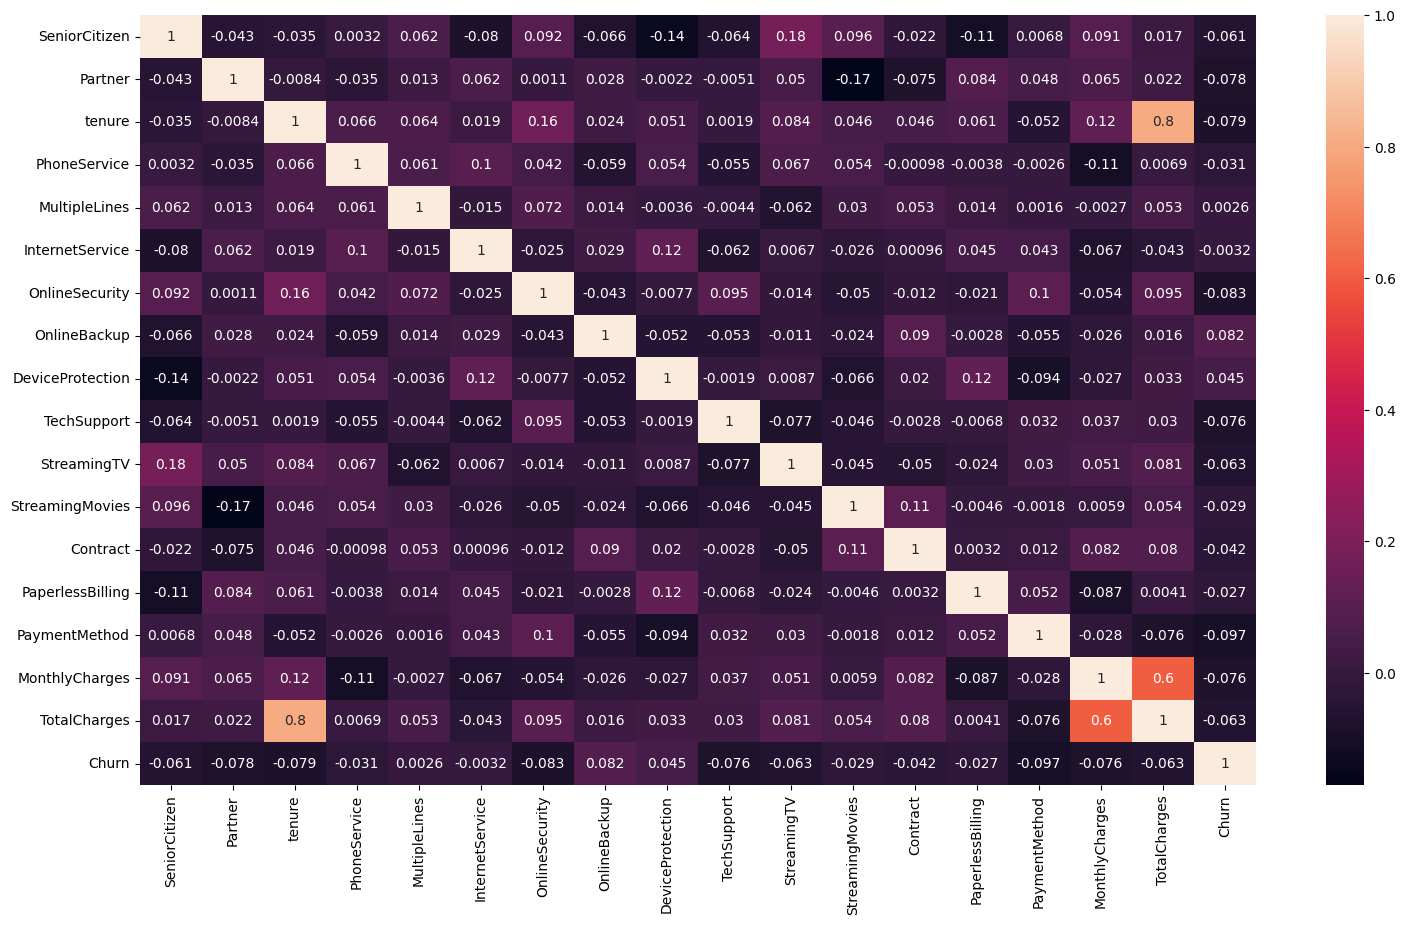

In [202]:
# prompt: heatmap with big size

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


### Train Test Split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

### Creating the sequential model

In [204]:
model = Sequential()

### Adding the input layer

In [205]:
model.add(Dense(units=X_train.shape[1], activation='relu', input_dim=X_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the hidden layers

In [206]:
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))

### Adding the output layer

In [207]:
model.add(Dense(units=1, activation='sigmoid'))

### Compiling the model

In [208]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Display model summary

In [209]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 8)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675 (2.64 KB)

 Trainable params: 675 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

### Fitting the model

In [210]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.4476 - loss: 137.1668 - val_accuracy: 0.6042 - val_loss: 72.7465
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4356 - loss: 98.7260 - val_accuracy: 0.6042 - val_loss: 37.3397
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4577 - loss: 41.1252 - val_accuracy: 0.5833 - val_loss: 8.7641
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3950 - loss: 7.0454 - val_accuracy: 0.4167 - val_loss: 14.5194
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5680 - loss: 12.6113 - val_accuracy: 0.4167 - val_loss: 18.4091
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5957 - loss: 13.9504 - val_accuracy: 0.4167 - val_loss: 10.7440
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5557 - loss: 7.1043 - val_accuracy: 0.5000 - val_loss: 2.5949
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4485 - loss: 4.4496 - val_accuracy: 0.5000 - val

## Evaluating the model

In [211]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4778 - loss: 0.7813 


[0.7803642153739929, 0.46666666865348816]

In [214]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        34
           1       0.00      0.00      0.00        26

    accuracy                           0.57        60
   macro avg       0.28      0.50      0.36        60
weighted avg       0.32      0.57      0.41        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


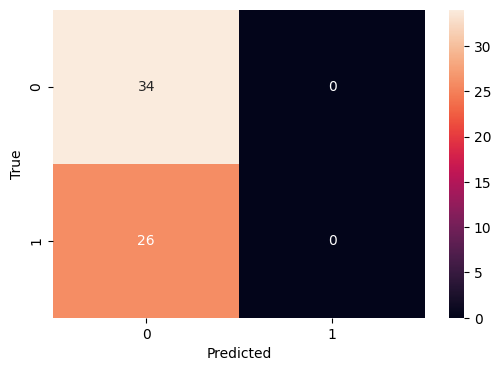

In [216]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()